C:\Users\chikr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chikr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chikr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chikr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

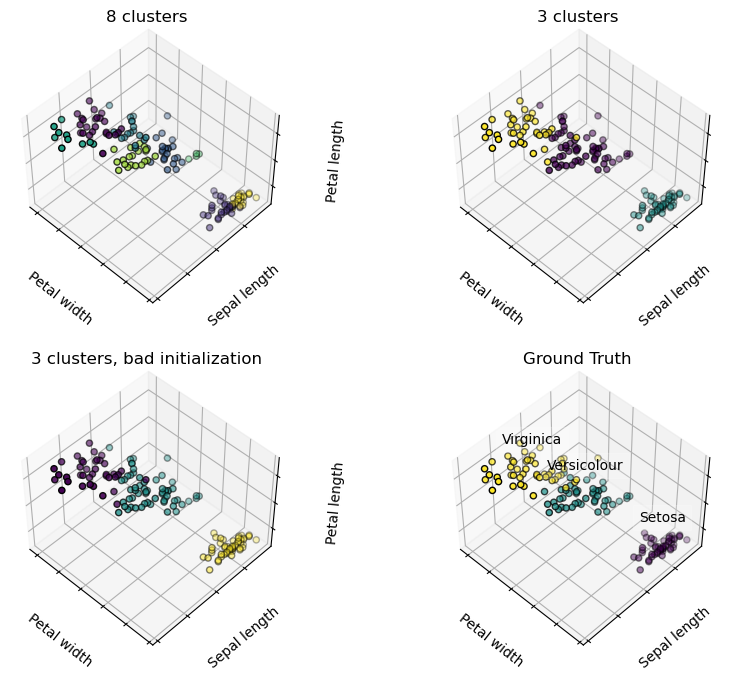

In [1]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

C:\Users\chikr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 ... 2 1 2]


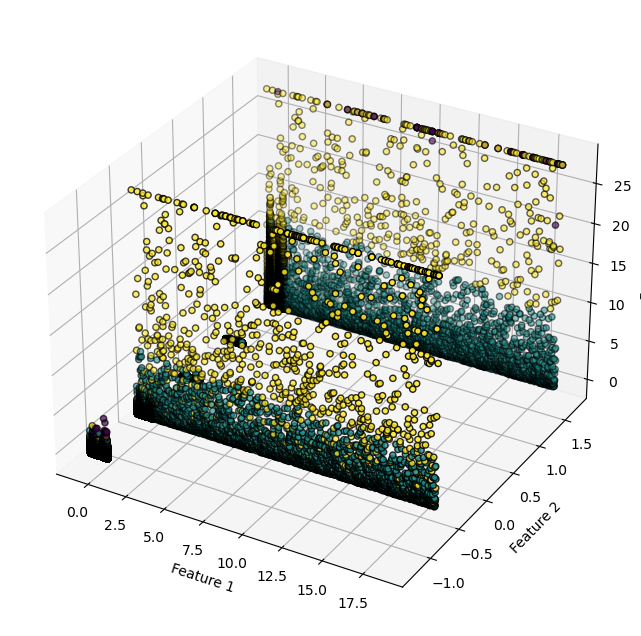

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Charger le fichier CSV
df = pd.read_csv("fichierfraudnet.csv", delimiter=";")

# Séparer les fonctionnalités (X) et la cible (y)
y = df['isFraud']
X = df.drop(columns=['isFraud'])

# Remplacer les virgules par des points dans les valeurs numériques
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X[numeric_cols] = X[numeric_cols].apply(lambda x: x.str.replace(',', '.')).astype(float)

# Convertir les variables catégorielles en numériques en utilisant le codage par étiquettes
label_encoder = LabelEncoder()
X['type'] = label_encoder.fit_transform(X['type'])

# Supprimer les colonnes non numériques pour simplifier cet exemple
X = X.drop(columns=['transactionId', 'nameOrig', 'nameDest'])

# Normaliser les données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialiser et entraîner le modèle de clustering (KMeans)
kmeans = KMeans(n_clusters=3)  # Choisissez le nombre de clusters approprié
kmeans.fit(X)

# Obtenir les étiquettes des clusters
labels = kmeans.labels_

# Imprimer les étiquettes des clusters
print(labels)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définir une fonction pour afficher les clusters dans un graphique 3D
def plot_clusters(X, labels):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Afficher les points de données colorés par leur cluster
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', edgecolor='k')

    # Étiqueter les axes
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    plt.show()

# Afficher les clusters
plot_clusters(X, labels)


C:\Users\chikr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 1 0 1]


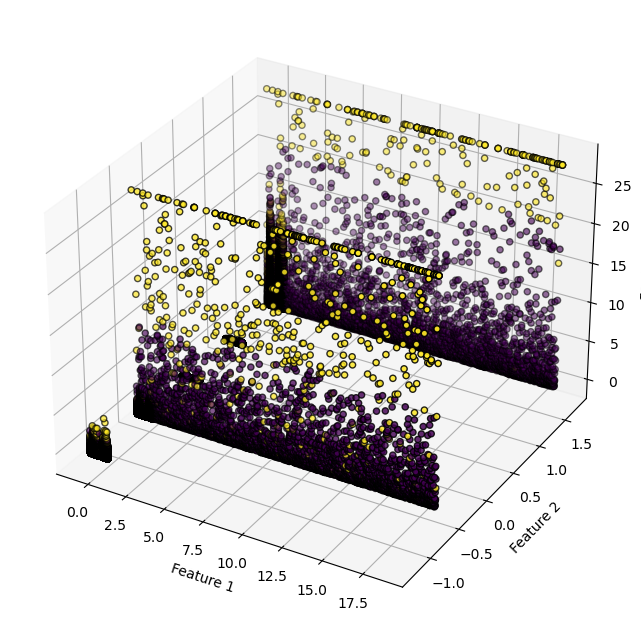

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Charger le fichier CSV
df = pd.read_csv("fichierfraudnet.csv", delimiter=";")

# Séparer les fonctionnalités (X) et la cible (y)
y = df['isFraud']
X = df.drop(columns=['isFraud'])

# Remplacer les virgules par des points dans les valeurs numériques
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X[numeric_cols] = X[numeric_cols].apply(lambda x: x.str.replace(',', '.')).astype(float)

# Convertir les variables catégorielles en numériques en utilisant le codage par étiquettes
label_encoder = LabelEncoder()
X['type'] = label_encoder.fit_transform(X['type'])

# Supprimer les colonnes non numériques pour simplifier cet exemple
X = X.drop(columns=['transactionId', 'nameOrig', 'nameDest'])

# Normaliser les données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialiser et entraîner le modèle de clustering (KMeans)
kmeans = KMeans(n_clusters=2)  # Choisissez le nombre de clusters approprié
kmeans.fit(X)

# Obtenir les étiquettes des clusters
labels = kmeans.labels_

# Imprimer les étiquettes des clusters
print(labels)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définir une fonction pour afficher les clusters dans un graphique 3D
def plot_clusters(X, labels):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Afficher les points de données colorés par leur cluster
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', edgecolor='k')

    # Étiqueter les axes
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    plt.show()

# Afficher les clusters
plot_clusters(X, labels)
